<a href="https://colab.research.google.com/github/Aleyucra74/Colab-google-MLP-OCR/blob/main/Copy_of_Desafio_Innovation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

PARTE DE CRIAÇÃO E TREINAMENTO DO MODELO ⛲ //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
%matplotlib inline

In [ ]:
#instalando convertedor de pdf para jpeg
!sudo apt upgrade && update
!sudo apt install poppler-utils
!pip install pytesseract pdf2image fuzzywuzzy poppler-utils PyMuPDF==1.18.9
!sudo apt install tesseract-ocr
!pip install flask-ngrok

In [ ]:
!which tesseract

In [ ]:
import pytesseract
import cv2
import os
import fuzzywuzzy
import numpy as np

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from PIL import Image
from pdf2image import convert_from_path

In [ ]:
#CRIAR AS PASTAS E SUBIR MANUALMENTE OS NFSe
#!mkdir /content/a_notas_fiscais/
!mkdir /content/images/
!mkdir /content/images_grays/
!mkdir /content/text_modelo/

#DEPOIS QUE CRIAR AS PASTAS SUBA AS NOTAS FISCAIS NA a_notas_fiscais/ 
# Caminho das notas \\brdcvmtaxanapd\Innovation-Grupo5$
# Tenho umas limpas, e com o nome alterado para macae@blabla.pdf para pegar manual o nome da cidade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

path, dirs, files = next(os.walk('/content/drive/MyDrive/Notas-png-gray/'))
file_count = len(files)
print(file_count)

In [ ]:
#TRANSFORMANDO O PDF EM IMAGEM 
import datetime
path_absolute = '/content/drive/MyDrive/Notas-preparadas/'
path_absolute_images = '/content/drive/MyDrive/Notas-png/'
# Colocar opcao para usar apenas primeira pagina                                                                                        
for imgn in os.listdir(path_absolute):
  try:
    image_path = convert_from_path(path_absolute+f'{imgn}', 400,output_folder=path_absolute_images,fmt='png',output_file=f'{imgn}')
  except:
    pass

In [ ]:
# RECORTANDO CABECALHOS E SALVANDO EM PNG 
#from google.colab.patches import cv2_imshow

path_absolute = '/content/drive/MyDrive/Notas-preparadas/'
path_absolute_images = '/content/drive/MyDrive/Notas-png/'
path_absolute_image_grays = '/content/drive/MyDrive/Notas-png-gray-v2/'
main_text = ''


#salva a imagem em cinza e ja realiza o corte do cabeçalho
for imgn in os.listdir(path_absolute_images):
    img = cv2.imread(path_absolute_images + f'{imgn}')
    height, width, channels = img.shape # as vezes dá erro aqui quando há arquivos ocultos na pasta. Favor deletar pasta e rodar de novo.
    y1=int(height*0.15)
    x2=int(width*0.75)
    x1=int(width*0.20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                              
    crop = gray[10:y1,x1:x2]
    file = path_absolute_image_grays + f'{imgn}.png'                                      
    cv2.imwrite(file,crop)

In [ ]:
path_absolute = '/content/drive/MyDrive/Notas-preparadas/'
path_absolute_images = '/content/drive/MyDrive/Notas-png/'
path_absolute_image_grays = '/content/drive/MyDrive/Notas-png-gray/'

import re
main_text = ''

#preferi pegar o nome da cidade no proprio nome do arquivo por exemplo: rio_de_janeiro@blablabla.pdf

for imgn in os.listdir(path_absolute_image_grays):
    file = path_absolute_image_grays + f'{imgn}'
    text = pytesseract.image_to_string(Image.open(file))
    main_text = text.replace('\n', ' ')                                                 
    name_city=re.split("[@]",f'{imgn}' )[-2]
    
    f=open('/content/drive/MyDrive/rep-array/main_array.txt', "a")     
    f.write( "%s§§§%s\n" % (main_text, name_city))             
    f.close()

#print(main_text)
#f=open('/content/text_modelo/main_array.txt',"r")
#print(f.read(20))

#cv2_imshow(crop)


In [ ]:
f=open('/content/drive/MyDrive/rep-array/main_array.txt',"r")
print(f.read(2000))

                 PREFEITURA MUNICIPAL DE SANTOS SECRETARIA MUNICIPAL DE FINANCAS NOTA FISCAL ELETRONICA DE SERVICO - NFS-e  No. da NFS-e substituida             21/06/2021 08:38:40 Codigo de Verificag           536892 Local da Prestaga §§§santos
                PREFEITURA MUNICIPAL DE SANTOS SECRETARIA MUNICIPAL DE FINANCAS NOTA FISCAL ELETRONICA DE SERVICO - NFS-e  No. da NFS-e substituida                      21/06/2021 16:59:07 Codigo de Verificag          Local da Prestaga §§§santos
                PREFEITURA MUNICIPAL DE SANTOS SECRETARIA MUNICIPAL DE FINANCAS NOTA FISCAL ELETRONICA DE SERVICO - NFS-e  No. da NFS-e substituida                      08/06/2021 17:53:55 Codigo de Verificag          Local da Prestaga §§§santos
PREFEITURA MUNICIPAL DE CAMPINAS SECRETARTA MIINTCTPAI DE ETNANCAG DE CAMDINAS    §§§campinas
             Numero da N  00012  Prefeitura Municipal de Vitoria Secretaria Municipal de Fazenda a Fiscal de Servicos Eletr6nica - NFS-e  me  Prestador de servicos 

In [ ]:
#Lendo o arquivo txt
#Transformando o dataframe para array numpy
import pandas as pd

header = ['Conteudo', 'Cidade']
base = pd.read_csv('/content/drive/MyDrive/rep-array/main_array.txt', sep='§§§', engine='python', names=header)
#engine='python'



In [ ]:
base = base.fillna(' ') #sem isso o encoding para binario da erro por nao entender Nan

In [ ]:
##Train_Test_Split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()

le.fit(base.loc[:,"Cidade"].unique())
df = base.to_numpy()
#Textos
#df[:,0]
#Cidades
#df[:,1]

#Shuffle the array
np.random.shuffle(df)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=50, min_df=5, max_df=0.08)
c1 = vectorizer.fit_transform(df[:,0]).toarray()


#dados separados somente com os textos de cada nota
treino, teste = train_test_split(c1, test_size=0.25, random_state=42)

#dados separados somente com os nomes das cidades de cada nota
esperado, validacao = train_test_split(df[:,1], test_size=0.25, random_state=42)

In [ ]:
gabarito = vectorizer.get_feature_names_out()
gabarito

array(['0001', '0005', '004', '02', '06', '12', '13', '15', '17', '18',
       '19', 'alegre', 'aparecida', 'barueri', 'bernardo', 'caetano',
       'campinas', 'campo', 'carioca', 'cidade', 'dados', 'das', 'elo',
       'es', 'finangas', 'fortaleza', 'go', 'goiania', 'hortolandia',
       'imperial', 'iota', 'janeiro', 'jardim', 'jundiai', 'ltda',
       'macae', 'na', 'nfe', 'pagina', 'paulo', 'pouso', 'recife', 'rio',
       'rua', 'santos', 'servigos', 'sorocaba', 'sul', 'telecomunicagoes',
       'vitoria'], dtype=object)

In [ ]:
#treino = pd.get_dummies(treino)
#teste = pd.get_dummies(teste)
esperado = le.transform(esperado)
validacao = le.transform(validacao)

In [ ]:
print(treino.shape)
print(teste.shape)
print(esperado.shape)
print(validacao.shape)

(3555, 50)
(1186, 50)
(3555,)
(1186,)


In [ ]:
teste

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#############################################
# SOMENTE DEPOIS (gpu para acelerar processamento)
#############################################
# from h2o4gpu.model_selection import train_test_split
# from h2o4gpu.neural_network import MLPClassifier
# from h2o4gpu.preprocessing import StandardScaler
# from h2o4gpu.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
#############################################

#Importando a técnica Multi Layer Perceptron do Sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
from collections import defaultdict
from datetime import datetime
import multiprocessing
import pandas as pd
import numpy as np
import joblib
#import cudf 
#import cupy

In [ ]:
#Modelo Multi Layer Perceptron

mlp = MLPClassifier(solver='sgd', alpha=0.001, max_iter=1000, hidden_layer_sizes=(3,6,8), learning_rate='adaptive') #2~ 3, 2~8,2~8 lbfgs
mlp.fit(treino, esperado) # treina

output = mlp.predict(teste) # testa e classifica

#nao consegui fazer a maioria das variaveis de resultado funcionar -eduardo
header = ['linhas_prc', 'iteracao','precisao','acuracia','acuracia_percent','mse','iters_to_fit','matriz_confusao','recal']
mmlp = pd.DataFrame(np.zeros((1,9)), columns=header) 
'''mmlp['linhas_prc'].append(linhas) 
mmlp['iteracao'].append((1,2,3))
mmlp['precisao'].append(precision_score(validacao, output))
mmlp['acuracia'].append(accuracy_score(validacao, output, normalize=False))
mmlp['acuracia_percent'].append(accuracy_score(validacao, output, normalize=False)/len(validacao))
mmlp['mse'].append(mean_squared_error(validacao, output))
mmlp['iters_to_fit'].append(mlp.n_iter_)
mmlp['matriz_confusao'].append(confusion_matrix(validacao, output))
mmlp['recal'].append(recall_score(validacao, output))'''
print('acuracia:', round(accuracy_score(validacao, output, normalize=False)/len(validacao), 4), '| Iters:', mlp.n_iter_) #'| precisao:', round(precision_score(validacao, output), 4),'| Recal:', round(recall_score(validacao, output), 4),""" '| mse:', round(mean_squared_error(validacao, output), 4), """ '| MLP:', ll, '| Tempo:', datetime.now()-dt1, '| ds:', nome_output, """ )

acuracia: 0.9966 | Iters: 594


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#mmlp
#output

#print(confusion_matrix(teste,output))
#print(classification_report(teste,output))
#print(accuracy_score(teste, output))

In [ ]:
#salvar no pickle e exportar para novas previsoes reais (operacao)
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

import pickle

# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(mmlp, open(filename, 'wb'))
with open('model_pkl', 'wb') as files:
    pickle.dump(mlp, files)

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mmlp, open(filename, 'wb'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
str_op ='sorocaba'

vectorizer2 = CountVectorizer(vocabulary=gabarito)
dop1 = vectorizer2.transform([str_op]).toarray()
dop1

with open('model_pkl', 'rb') as training_model:
    model = pickle.load(training_model)

output2 = model.predict(dop1)

output2 = le.inverse_transform(output2)
print(output2)

['sorocaba']


In [ ]:
gabarito

array(['0001', '0005', '004', '02', '06', '12', '13', '15', '17', '18',
       '19', 'alegre', 'aparecida', 'barueri', 'bernardo', 'caetano',
       'campinas', 'campo', 'carioca', 'cidade', 'dados', 'das', 'elo',
       'es', 'finangas', 'fortaleza', 'go', 'goiania', 'hortolandia',
       'imperial', 'iota', 'janeiro', 'jardim', 'jundiai', 'ltda',
       'macae', 'na', 'nfe', 'pagina', 'paulo', 'pouso', 'recife', 'rio',
       'rua', 'santos', 'servigos', 'sorocaba', 'sul', 'telecomunicagoes',
       'vitoria'], dtype=object)

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#PARTE DE OPERACAO⛳ (substituido pela seção API)
///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [ ]:
%matplotlib inline

In [ ]:
#instalando convertedor de pdf para jpeg
!sudo apt upgrade && update
!sudo apt install poppler-utils
!pip install pytesseract pdf2image fuzzywuzzy poppler-utils PyMuPDF==1.18.9
!sudo apt install tesseract-ocr
!pip install flask-ngrok Werkzeug

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
import pytesseract
import cv2
import os
import fuzzywuzzy
import numpy as np

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from PIL import Image
from pdf2image import convert_from_path

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#CRIAR AS PASTAS E SUBIR MANUALMENTE OS NFSe
!mkdir /content/operacao/
!mkdir /content/operacao/a_notas_fiscais/
!mkdir /content/operacao/images/
!mkdir /content/operacao/images_grays/
!mkdir /content/operacao/text_modelo/

#DEPOIS QUE CRIAR AS PASTAS SUBA AS NOTAS FISCAIS NA a_notas_fiscais/ 
# Caminho das notas \\brdcvmtaxanapd\Innovation-Grupo5$
# Tenho umas limpas, e com o nome alterado para macae@blabla.pdf para pegar manual o nome da cidade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#TRANSFORMANDO O PDF EM IMAGEM 
import datetime
#path_absolute = '/content/drive/MyDrive/Notas-de-operacao/'
path_absolute = '/content/operacao/a_notas_fiscais/'
path_absolute_images = '/content/operacao/images/'
                                                                                        
for imgn in os.listdir(path_absolute):
  try:
    image_path = convert_from_path(path_absolute+f'{imgn}', 500,output_folder=path_absolute_images,fmt='jpeg',output_file=f'{imgn}')
    #print(image_path)
    type(image_path)
  except:
    pass

In [ ]:
# RECORTANDO CABECALHOS E SALVANDO EM PNG 
#from google.colab.patches import cv2_imshow

path_absolute = '/content/drive/MyDrive/Notas-de-operacao/'
path_absolute_images = '/content/operacao/images/'
path_absolute_image_grays = '/content/operacao/images_grays/'
main_text = ''

#salva a imagem em cinza e ja realiza o corte do cabeçalho
for imgn in os.listdir(path_absolute_images):
    img = cv2.imread(path_absolute_images + f'{imgn}')
    height, width, channels = img.shape
    y1=int(height*0.13)
    x2=int(width*0.70)
    x1=int(width*0.20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                              
    crop = gray[10:y1,x1:x2]
    file = path_absolute_image_grays + f'{imgn}.png'                                      
    cv2.imwrite(file,crop)

In [ ]:
path_absolute = '/content/drive/MyDrive/Notas-de-operacao/'
path_absolute_images = '/content/operacao/images/'
path_absolute_image_grays = '/content/operacao/images_grays/'

import re
main_text = ''

#preferi pegar o nome da cidade no proprio nome do arquivo por exemplo: rio_de_janeiro@blablabla.pdf

for imgn in os.listdir(path_absolute_image_grays):
    file = path_absolute_image_grays + f'{imgn}'
    text = pytesseract.image_to_string(Image.open(file))
    main_text = text.replace('\n', ' ')                                                 
    #name_city=re.split("[@]",f'{imgn}' )[-2]
    # metodo esta sobreescrevendo os textos, validar quando a primeira vez inserir o texto, mudar o "w" para append "a"
    f=open('/content/operacao/text_modelo/agendamento_da_vez.txt', "a")     
    f.write( "%s\n" % (main_text))             
    f.close()

#print(main_text)
#f=open('/content/text_modelo/main_array.txt',"r")
#print(f.read(20))

#cv2_imshow(crop)


In [ ]:
# testando uma nota da operacao

In [ ]:
gabarito

In [ ]:
print(str_op)

In [ ]:
#import pandas as pd

#base_op = pd.read_csv('/content/operacao/text_modelo/agendamento_da_vez.txt', sep='§§§', engine='python')
#base_op

In [ ]:
#consegui fazer quando a pessoa pedir previsao de só uma nota

#"""PEÇO SUA AJUDA PARA UM CASO QUE A PESSOA PEÇA PARA PREVER VARIAS NOTAS DE UMA VEZ:
#caminho='/content/operacao/text_modelo/agendamento_da_vez.txt'
#with open('/content/operacao/text_modelo/agendamento_da_vez.txt', 'r') as file:
#    str_op = file.read()#.replace('\n', '')

##### pelo visto só dá pra entrar no encoding como string. O numpy, pandas e lista dão erro.

#with open(caminho) as f:
#  lines = [line.rstrip() for line in f]
#  vectorizer2 = CountVectorizer(vocabulary=gabarito)
#  dop1 = vectorizer2.transform([line]).toarray()
  #dop1 = vectorizer2.transform([str_op]).toarray()
#  g=open('/content/operacao/text_modelo/agendamento_em_array.txt', "a")     
#  g.write( "%s\n" % (dop1))             
#  g.close()
  
#g=open('/content/operacao/text_modelo/agendamento_em_array.txt',"r")
#print(g.read(2000))
#"""


In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(mmlp, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

from sklearn.feature_extraction.text import CountVectorizer
str_op ="barueri"

vectorizer2 = CountVectorizer(vocabulary=gabarito)
dop1 = vectorizer2.transform([str_op]).toarray()
dop1

with open('model_pkl', 'rb') as training_model:
    model = pickle.load(training_model)

output2 = model.predict(dop1)

output2 = le.inverse_transform(output2)
print(output2)


#print('acuracia:', round(accuracy_score(validacao, output2, normalize=False)/len(validacao), 4), '| Iters:', mlp.n_iter_)


# joblib.dump(last_mlp, nome_output + '.pkl', compress=7) # exporta o modelo treinado

# foi ? não entendo muito bem como funciona agora, ele salvou o modelo exatamente como foi chamado em cima

['macae']


a matriz gabarito me parece fundamental, pois para entrar nela só pega palavras exatas cadastradas na matriz gabarito. Por exemplo, "palo" não tem e passaria batido pois nem entraria no modelo.
Mais pra frente, talvez pensar uma forma de misturar o fuzzy adicionando mais colunas semelhantes nessa matriz.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#API SECAO
///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 ~ importar somente o array de textos das cidades que foi gerado(aquele com 900 notas)
 </br>
 ~ importar o arquivo gerado pelo modelo (aquele model_pkl)

In [ ]:
!sudo apt upgrade && update
!sudo apt install poppler-utils
!pip install pytesseract pdf2image fuzzywuzzy poppler-utils PyMuPDF==1.18.9
!sudo apt install tesseract-ocr
!pip install flask-ngrok Werkzeug flask_cors

In [ ]:
!mkdir /content/operacao/
!mkdir /content/operacao/a_notas_fiscais/
!mkdir /content/operacao/images/
!mkdir /content/operacao/images_grays/
!mkdir /content/operacao/text_modelo/

In [ ]:
import os
import cv2
import pickle
import fuzzywuzzy
import numpy as np
import pytesseract
import pandas as pd
from PIL import Image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn import preprocessing
from flask_ngrok import run_with_ngrok
from pdf2image import convert_from_path
from flask import Flask, request, redirect, url_for
from werkzeug.utils import secure_filename
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#importar main_array
header = ['Conteudo', 'Cidade']
base = pd.read_csv('/content/operacao/text_modelo/ok-v2-main_array.txt', sep='§§§', engine='python', names=header)

base = base.fillna(' ')

In [ ]:
le = preprocessing.LabelEncoder()

le.fit(base.loc[:,"Cidade"].unique())
df = base.to_numpy()

np.random.shuffle(df)


vectorizer = CountVectorizer(max_features=50, min_df=5, max_df=0.08)
c1 = vectorizer.fit_transform(df[:,0]).toarray()

In [ ]:
gabarito = vectorizer.get_feature_names_out()

In [ ]:
gabarito

array(['0001', '0005', '004', '02', '06', '12', '13', '15', '17', '18',
       '19', 'alegre', 'aparecida', 'barueri', 'bernardo', 'caetano',
       'campinas', 'campo', 'carioca', 'cidade', 'dados', 'das', 'elo',
       'es', 'finangas', 'fortaleza', 'go', 'goiania', 'hortolandia',
       'imperial', 'iota', 'janeiro', 'jardim', 'jundiai', 'ltda',
       'macae', 'na', 'nfe', 'pagina', 'paulo', 'pouso', 'recife', 'rio',
       'rua', 'santos', 'servigos', 'sorocaba', 'sul', 'telecomunicagoes',
       'vitoria'], dtype=object)

##FUNCAO PREVER NOTA

In [ ]:
#funcao para prever a nota
#importar modelo model_pkl
def predict_nota(text):
  vectorizer2 = CountVectorizer(vocabulary=gabarito)
  dop1 = vectorizer2.transform([text]).toarray()
  with open('model_pkl', 'rb') as training_model:
    model = pickle.load(training_model)

  output2 = model.predict(dop1)
  #le = preprocessing.LabelEncoder()
  #output2 = le.inverse_transform(output2)
  return output2

In [ ]:
textoNota = """PREFEITURA DA CIDADE DO SANTOS SECRETARIA MUNICIPAL DE FAZENDA NOTA FISCAL DE SERVICOS ELETRONICA - NFS-e """


In [ ]:
predict_nota(textoNota)

array([10])

##FUNCAO TRANSFORMAR NOTA

In [ ]:
#funcao para transformar a nota em texto
def transform_nota_text(path, filename):
  main_text = ''
  image_path = convert_from_path(path+f'a_notas_fiscais/{filename}', 500,output_folder=path+'images/',fmt='jpeg',output_file=filename)
  img = cv2.imread(path + f'images/{filename}0001-1.jpg')
  height, width, channels = img.shape
  y1=int(height*0.13)
  x2=int(width*0.70)
  x1=int(width*0.20)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                              
  crop = gray[10:y1,x1:x2]
  file = path + f'images_grays/{filename}.png'
  cv2.imwrite(file,crop)
  text = pytesseract.image_to_string(Image.open(file))
  main_text = text.replace('\n', ' ')
  os.remove(path+f'a_notas_fiscais/{filename}')
  os.remove(path+f'images/{filename}0001-1.jpg')
  os.remove(path+f'images_grays/{filename}.png')
  return main_text

In [ ]:
pathTest = '/content/operacao/'
nameFile = 'macae0b048b4f-5a5c-4b29-9e45-01a62f6d1b5f_NF_524_CRC.pdf'
transform_nota_text(path=pathTest, filename=nameFile)

'PREFEITURA DA CIDADE DO RIO DE JANEIRO  SECRETARIA MUNICIPAL DE FAZENDA NOTA FISCAL DE SERVICOS ELETRONICA - NFS-e \x0c'

##API

In [ ]:
#SIMPLE API to test de model
import os
import pickle
import secrets
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from flask import Flask, request, redirect, url_for, jsonify, make_response, flash
from flask_cors import CORS, cross_origin
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename

le = preprocessing.LabelEncoder()
secret_key = secrets.token_hex(16)
#cors = CORS(app)

UPLOAD_FOLDER = '/content/operacao/'
ALLOWED_EXTENSIONS = {'txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'}

app = Flask(__name__)
app.config['SECRET_KEY'] = secret_key
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
CORS(app)

run_with_ngrok(app)   

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

#teste somente para fazer o upload de uma nota
@app.route('/', methods=['POST'])
#@cross_origin()
def upload_file():
    if request.method == 'POST':
        # check if the post request has the file part
        #if 'file' not in request.files:
        #    flash('No file part')
        #    return redirect(request.url)
        f = request.files['file']
        # If the user does not select a file, the browser submits an
        # empty file without a filename.
        #if file.filename == '':
         #   flash('No selected file')
          #  return redirect(request.url)
        if f and allowed_file(f.filename):
            filename = secure_filename(f.filename)
            f.save(os.path.join(app.config['UPLOAD_FOLDER']+'a_notas_fiscais/', filename))
            textfile = transform_nota_text(app.config['UPLOAD_FOLDER'], filename)
            predict = predict_nota(textfile)
            #redirect(url_for('upload_file', name=filename))
            #return make_response(jsonify({"predict": predict}), 200)
            print(predict)
            print(jsonify({"predict": int(predict)}))
            #response = jsonify({"predict": int(predict)})
            #response.response.headers.add('Access-Control-Allow-Origin', '*')
            return jsonify({"predict": int(predict)})
    
app.run()

##problemas de como chamar ele e receber
# envio a nota - OKAY
# faz o tratamento da nota ? OKAY
# como retornar ela ? OKAY - retornando json no insomnia ou postman
# erro somente retorna 302 ???????
#ERROS DO FRONTEND Error: Network Error
# xhr.js:210 GET http://6815-35-233-128-182.ngrok.io/ net::ERR_TOO_MANY_REDIRECTS 302
#a foto abaixo mostra que se somente chamar a api ele funciona prevendo a nota



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://1e93-34-83-169-160.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [13/Dec/2021 15:53:05] "POST / HTTP/1.1" 200 -


[9]
<Response 14 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 15:53:41] "POST / HTTP/1.1" 200 -


[15]
<Response 15 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 16:03:00] "POST / HTTP/1.1" 200 -


[6]
<Response 14 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 16:23:10] "POST / HTTP/1.1" 200 -


[15]
<Response 15 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 16:40:27] "POST / HTTP/1.1" 200 -


[5]
<Response 14 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 16:54:27] "POST / HTTP/1.1" 200 -


[10]
<Response 15 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 17:01:25] "POST / HTTP/1.1" 200 -


[15]
<Response 15 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 17:02:48] "POST / HTTP/1.1" 200 -


[15]
<Response 15 bytes [200 OK]>


127.0.0.1 - - [13/Dec/2021 17:03:06] "POST / HTTP/1.1" 200 -


[2]
<Response 14 bytes [200 OK]>


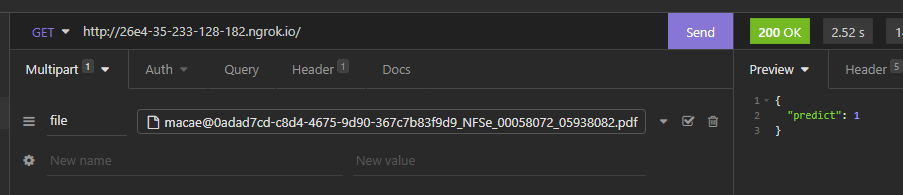

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////// 

#FIM📷 (abaixo disso é rascunho desprezível)


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
treino = vectorizer.fit_transform(treino).toarray()
teste = vectorizer.fit_transform(teste).toarray()

NameError: ignored

In [ ]:
#Shuffle the array
#np.random.shuffle(df)

In [ ]:
#treino2 = (','.join(str(v) for v in treino))

In [ ]:
# consolidar todas as colunas em uma só para as variaveis TREINO e TESTE
teste= []

treinopd =pd.DataFrame(treino)

for row in treinopd.iterrows():
  x = ','.join([str(y) for y in row])
  teste.append(x)

teste2=teste.to_numpy()
# transformar em np.array

In [ ]:
def juntar(y):
  x = int(''.join([str(y) for y in row]))
  return x

np.apply_along_axis(juntar, 0, treino)

In [ ]:
#ideia alternativa, talvez melhor
def my_func(a):
  mybytes = a.encode('utf-8')
  myint = int.from_bytes(mybytes, 'little')
  return myint


np.apply_along_axis(my_func, 0, treino)

treino


In [ ]:
mystring = "MUNICIPIO DE MACAE SECRETARIA MUNICIPAL DE FAZENDA  NOTA FISCAL DE SERVICOS ELETRONICA - NFS-e"
mybytes = mystring.encode('utf-8')
myint = int.from_bytes(mybytes, 'little')
print(myint)
recoveredbytes = myint.to_bytes((myint.bit_length() + 7) // 8, 'little')
recoveredstring = recoveredbytes.decode('utf-8')
print(recoveredstring)


----------------------------------------------------------
Em construção


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
#array([[0.038..., 0.961...]])
clf.predict(X_test[:5, :])
#array([1, 0, 1, 0, 1])
clf.score(X_test, y_test)
#0.8...

----------------------------------------------------------------------------------------------------------------------------------------------------------------
RASCUNHO ANTIGO:

In [ ]:
#X, y = df[:,0].fillna(' '), df.sentiment
#v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
import numpy as np
gambi= ["a","b"]

np.char.encode(gambi, encoding='utf-8')

In [ ]:
import pickle

'''serialized = pickle.dumps(treino, protocol=0) # protocol 0 is printable ASCII
deserialized_a = pickle.loads(serialized)
print(serialized)

memfile = io.BytesIO()
numpy.save(memfile, treino)
memfile.seek(0)
serialized = json.dumps(memfile.read().decode('latin-1'))
# latin-1 maps byte n to unicode code point n

In [ ]:
''' proximos passos: 
(50%)verificar limite de notas colab, a priori nao consegui botar todas 1400
(50%)criar e salvar o array grandalhão com todas cidades - feito
embaralhar o array com funcao shuffle - feito
tirar 75% das linhas do array para treino & esperado e 25% para teste & validação - feito
separar as duas colunas (pares conforme imagem abaixo) : treino x esperado , teste x validação  
machine learning - utilizando MLPClassifier / a documentacao dele esta no site deles.

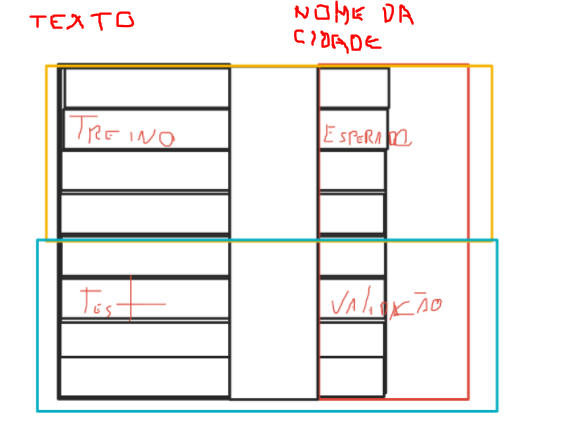

In [ ]:
"""
numero_linhas = len(df)
treino = numero_linhas * 0.75
teste = numero_linhas * 0.25
limit = numero_linhas * 0.75

array_treino = linhas[:limit]
array_test = linhas[limit:]

import numpy as np
base2.apply(np.random.shuffle, axis=0)

separar os pares: esperado e validacao

----------------------------------------------------------------

In [ ]:
""""import shutil
try:
    shutil.rmtree("/content/images_grays")
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
"""import os

path, dirs, files = next(os.walk("/content/a_notas_fiscais"))
file_count = len(files)
print(file_count)

In [ ]:
"""!zip -r /content/images.zip /content/images
from google.colab import files
files.download("/content/images.zip")

In [ ]:
import re
name_city=re.split("[@]",f'rio_de_janeiro@arquivo.txt' )[-2]
print (name_city)

In [ ]:
#Depois salvar o txt convertido num arquivo txt
path_absolute = '/content/a_notas_fiscais/'
path_absolute_images = '/content/images/'
path_absolute_image_grays = '/content/images_grays/'

#def splitTextToQuadruple(string):
#    words = string.split()
#    grouped_words = [' '.join(words[i: i + 4]) for i in range(0, len(words), 4)]
#    return grouped_words

main_text = ''

#fiz só 1 exemplo: rio de janeiro test.Por gentileza, amarrar um for aqui
name_city="macae" # variar cidade pra cidade, pegar no nome da pasta criada manual no colab
name_txt="test_"+name_city # variar comeco do txt em train_, valid_, test_ 

for imgn in os.listdir(path_absolute_image_grays):
    file = path_absolute_image_grays + f'{imgn}'
    text = pytesseract.image_to_string(Image.open(file))
    text += text.replace('\n', '',) + '\n'
    # metodo esta sobreescrevendo os textos, validar quando a primeira vez inserir o texto, mudar o "w" para append "a"
    f=open('/content/text_modelo/'+f'{name_txt}.txt', "a")      #generalizar tbm
    f.write( "(%s,%s)\n" % (text, name_city))              #acho que a tupla não é bem assim ( | ), mas separar por virgula dá certo?  
    f.close()

#print(main_text)
#f=open("/content/tuplas/test/test_rio_de_janeiro.txt","r")
#print(f.read())

#cv2_imshow(crop)

In [ ]:
# RECORTANDO CABECALHOS, SALVANDO PNG
from google.colab.patches import cv2_imshow


#Depois salvar o txt convertido num arquivo txt
path_absolute = '/content/a_notas_fiscais/'
path_absolute_images = '/content/images/'
path_absolute_image_grays = '/content/images_grays/'

#salva a imagem em cinza e ja realiza o corte do cabeçalho
for imgn in os.listdir(path_absolute_images):
    img = cv2.imread(path_absolute_images + f'{imgn}')
    height, width, channels = img.shape
    y1=int(height*0.13)
    x2=int(width*0.70)
    x1=int(width*0.20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                              
    crop = gray[10:y1,x1:x2]
    file = path_absolute_image_grays + f'{imgn}.png'                                      
    cv2.imwrite(file,crop)

In [ ]:
#PEGANDO AS IMAGENS E TRANSFORMANDO EM TXT

#Depois salvar o txt convertido num arquivo txt
path_absolute = '/content/a_notas_fiscais/'
path_absolute_images = '/content/images/'
path_absolute_image_grays = '/content/images_grays/'
main_text = ''

for imgn in os.listdir(path_absolute_images):
    img = cv2.imread(path_absolute_images + f'{imgn}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                              
    file = path_absolute_image_grays + f'{imgn}.png'                                      
    cv2.imwrite(file,gray)
    text=pytesseract.image_to_string(Image.open(file))
    main_text += text.replace('\n', '',) + '\n'                                                 
    
print(main_text)


In [ ]:
#TRANSFORMANDO O PDF EM IMAGEM -> pdf2Image 
import datetime
path_absolute = '/content/a_notas_fiscais/'
path_absolute_images = '/content/images/'

from pdf2image import convert_from_path
#from pdf2image.exceptions import PDFPageCountError
   

for imgn in os.listdir(path_absolute):
  #current_date=datetime.datetime.today().strftime ('%X-%d-%b-%Y')
  #os.rename(path_absolute+f'{imgn}',path_absolute+f'{current_date}_{imgn}')
  try:
    image_path = convert_from_path(path_absolute+f'{imgn}', 500,output_folder=path_absolute_images,fmt='jpeg',output_file=f'{imgn}')
  except PDFPageCountError:
    pass
#Pontos a se levantar:
#> como salvar com o mesmo nome de arquivo
#> como saber que a imagem gerada é referente ao pdf convertido

In [ ]:
#print(os.listdir('C:\\Users\\aespinoza\\Documents\\INNOVATION\\NOTAS_TESTE\\'))

main_text = ''
for imgn in os.listdir('/a_notas_fiscais/bruto_teste/temp/'):
    img = cv2.imread(f'/a_notas_fiscais/bruto_teste/temp/image1.jpg')
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    file = f'/a_notas_fiscais/bruto_teste/teste{imgn}.png'
    cv2.imwrite(file,img)
    text=pytesseract.image_to_string(Image.open(file))
    main_text += text.replace('\n', '') + '\n'

print(main_text)

In [ ]:
from PIL import Image
from pdf2image import convert_from_path
import cv2

path ='/a_notas_fiscais/bruto_teste/temp'
header_offset = 200
footer_offset = 100

page.crop((0, header_offset, page.width, footer_offset))
#convert_from_path('/a_notas_fiscais/bruto_teste/macae/file1.pdf',fmt='jpeg')


#images = images.save(path)
#display(images[0])

In [ ]:
from PIL import Image
from pdf2image import convert_from_path
import cv2

path ='/a_notas_fiscais/bruto_teste/temp'
header_offset = 2
footer_offset = 1

images = [
    page.crop((0, header_offset, page.width, footer_offset))
    for page in convert_from_path('/a_notas_fiscais/bruto_teste/macae/file1.pdf',fmt='jpeg')
]
print(page.width, page.height)
#images = images.save(path)
#display(images[0])


In [ ]:
from pdf2image import convert_from_path
path='/a_notas_fiscais/bruto_teste/temp'
pages = convert_from_path('/a_notas_fiscais/bruto_teste/macae/file1.pdf', 500, output_folder=path,fmt='jpeg')
#display(pages[0])

In [ ]:
from PIL import Image
img = Image.open('/a_notas_fiscais/bruto_teste/temp/image1.jpg')
area = (0,100,100,100)
cropped_img = img.crop(area)
cropped_img.save('/a_notas_fiscais/bruto_teste/cropped/crop4.jpg')



Daqui pra baixo são trechos de códigos vistos no GitHub de trechos que ainda vamos ter que usar. A maioria ainda não foi usada. Servem de inspiração quando chegar na hora certa.

In [ ]:
#instalando tesseract
!sudo apt install tesseract-ocr
!pip install pytesseract pdf2image thefuzz poppler-utils PyMuPDF==1.18.9

In [ ]:
# importando opencv , tesseract , thefuzz
import pytesseract
from PIL import Image
import cv2
import re
from thefuzz import fuzz
from thefuzz import process
import fitz

import os

In [ ]:
#tentativa 2
!pip install pdf2image
import tempfile

with tempfile.TemporaryDirectory('/a_notas_fiscais/bruto_teste/temp') as path:
    images_from_path = convert_from_path('/a_notas_fiscais/bruto_teste/macae/0ae323a6-9fb8-4899-90b0-123887037a21_NFSe_00003548_00027714.pdf', output_folder=path)




In [ ]:
#tentativa 3
!pip install pdf2image

from pdf2image import convert_from_path
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
pages=convert_from_path('/a_notas_fiscais/bruto_teste/macae/0ae323a6-9fb8-4899-90b0-123887037a21_NFSe_00003548_00027714.pdf')


In [ ]:
# demonstração importando pasta inteira de notas 
textos = {}
for pdf in os.listdir('/a_notas_fiscais/bruto_teste'):
  img_pdf = convert_pdf2img(pdf)
  for imagem in img_pdf:
    textos[imagem] = proc(imagem)

In [ ]:
#lendo palavras do pdf>imagem>palavras (opção 1)
def proc():
    main_text = ''
    for imgn in os.listdir('imgs'):
        img = cv2.imread(f'imgs/{imgn}')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        file = f'grays\{imgn}.png'
        cv2.imwrite(file,gray)
        text=pytesseract.image_to_string(Image.open(file))
        main_text += text.replace('\n', '') + '\n'
    return main_text

In [ ]:
#lendo palavras do pdf>imagem>palavras (opção 2) (testar)
def proc():
    main_text = ''
    for imgn in os.listdir('imgs'):
        img = cv2.imread(f'imgs/{imgn}')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        text=pytesseract.image_to_string(gray)
        main_text += text.replace('\n', '') + '\n'
    return main_text

In [ ]:
#demonstração de como cortar pedaço do pdf (cabeçalho)
# from google.colab.patches import cv2_imshow # para visualizar imagem
def proc(imgn):
    img = cv2.imread(f'{imgn}')
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    crop_img1 = img[25:73, 250:843].copy()
    crop_img2 = img[10:170,20:230].copy() 
    # cv2_imshow(crop_img1) # para visualizar o corte 
    # cv2_imshow(crop_img2)
    text=pytesseract.image_to_string(crop_img1).replace('\n', '')
    return [text, crop_img2] # retorna texto encontrado e imagem do brazão

In [ ]:
#demonstração de tratamento do pdf para o tesseract ler melhor
def convert_pdf2img(input_file: str, pages:tuple = None):
    if not os.path.isdir('pasta_pdf'): os.mkdir('pasta_pdf')
    """Converts pdf to image and generates a file by page"""
    # Open the document
    pdfIn = fitz.open(input_file)
    output_files = []
    # Iterate throughout the pages
    for pg in range(pdfIn.pageCount):
        if pages is not None:
            if str(pg) not in str(pages):
                continue
        # Select a page
        page = pdfIn[pg]
        rotate = int(0)
        # PDF Page is converted into a whole picture 1056*816 and then for each picture a screenshot is taken.
        # zoom = 1.33333333 -----> Image size = 1056*816
        # zoom = 2 ---> 2 * Default Resolution (text is clear, image text is hard to read)    = filesize small / Image size = 1584*1224
        # zoom = 4 ---> 4 * Default Resolution (text is clear, image text is barely readable) = filesize large
        # zoom = 8 ---> 8 * Default Resolution (text is clear, image text is readable) = filesize large
        zoom_x = 2
        zoom_y = 2
        # The zoom factor is equal to 2 in order to make text clear
        # Pre-rotate is to rotate if needed.
        mat = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
        pix = page.getPixmap(matrix=mat, alpha=False)
        output_file = f"pasta_pdf/{os.path.splitext(os.path.basename(input_file))[0]}_page{pg+1}.png"
        
        pix.writePNG(output_file)
        
        output_files.append(output_file)
    pdfIn.close()
    summary = {
        "File": input_file, "Pages": str(pages), "Output File(s)": str(output_files)
    }
    # Printing Summary
    print("## Summary ########################################################")
    print("\n".join("{}:{}".format(i, j) for i, j in summary.items()))
    print("###################################################################")
    return output_files

In [ ]:
#demonstração de como salvar as palavras e as classes (municipios)

# palvras palaavras sao paulo palavras | classe1
# palvras palaavras sao paulo palavras | classe1
# palvras palaavras sao paulo palavras | classe1
# Treino 70% ~ 85% das notas 
# Teste 30% ~ 15% das notas
# (76% train - 12% validation - 12% test)

esperado = array_de_classes
treino = array_de_textos

teste = array_de_textos_teste
validacao = array_de_classes_teste

Ideia 2

Não usar machine learning, e sim a função thefuzz que agrupa palavras parecidas. A leitura com opencv e tesseract continuam iguais à ideia 1.

In [ ]:
#demonstração da lógica fuzz 
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
fuzz.token_set_ratio("NotaPREFEITURA DA CIDADE DO RIO  JANEIRO", "Rio de Janeiro")

Ideia 3

Fazer reconhecimento apenas por imagem do brasão da cidade (abordagem diferente)